## Imersão Dados - Aula 1: Introdução - Python e Pandas

Olá! Bem-vindos ao meu notebook da Imersão dados da Alura.

O intuito desse notebook é de resolver os desafios propostos pelos professores e instrutores da Alura.


In [156]:
import pandas as pd

url = 'https://gist.githubusercontent.com/alnbastos/5809f16bdf7585986d6467a17457991e/raw/78d5edde75bbc44d7799487ac7d3692831070b96/dados_imoves.csv'
dados_imoveis = pd.read_csv(url)

# 1 - Realizar a média da metragem para cada um dos bairros.

**Primeira forma encontrada para a solução**

In [174]:
# agrupando os bairros e as metragens
dados_imoveis_bairro = dados_imoveis.groupby('Bairro')['Metragem'].apply(list)

# obtendo a media da metragem por bairro
list_media_metragem = list()
for metragem in dados_imoveis_bairro:
  media_metragem = sum(metragem) / len(metragem)
  list_media_metragem.append(media_metragem)

df_media_bairro = pd.DataFrame({
    'Bairro': dados_imoveis_bairro.index,
    'Metragem': list_media_metragem
})
df_media_bairro

,Bairro,Metragem
0,Aclimação,253.056818
1,Alto da Boa Vista,418.875000
2,Alto da Lapa,294.337209
3,Alto da Mooca,270.050000
4,Alto de Pinheiros,433.444988
...,...,...
696,Vila Água Funda,152.200000
697,Água Branca,191.000000
698,Água Fria,165.416667
699,Água Funda,139.000000


**Segunda forma encontrada para a resolução**

A variável `dados_imoveis_bairro` por si só, traz o dataframe contendo a Metragem, Quartos, Banheiros e Vagas. Porém, o Bairro é o indice do dataframe.
Esta forma, foi criado um novo dataframe onde o Bairro, Metragem, Quartos, Banheiros e Vagas são todos colunas.|

In [173]:
# grupando os bairros e obtendo a média da metragem
dados_imoveis_bairro = dados_imoveis.groupby('Bairro').mean()

# criando um dataframe com as informações
df_media_bairro1 = pd.DataFrame({
    'Bairro': dados_imoveis_bairro.index,
    'Metragem': dados_imoveis_bairro['Metragem'].values
})
df_media_bairro1

,Bairro,Metragem
0,Aclimação,253.056818
1,Alto da Boa Vista,418.875000
2,Alto da Lapa,294.337209
3,Alto da Mooca,270.050000
4,Alto de Pinheiros,433.444988
...,...,...
696,Vila Água Funda,152.200000
697,Água Branca,191.000000
698,Água Fria,165.416667
699,Água Funda,139.000000


# 2 - Duas formas de selecionar os dados por bairro.
Consultar os métodos na documentação do Pandas.

In [165]:
# Forma 1
# Consulta o primeiro dado da base de dados
dados_imoveis.loc[0]

Rua          Avenida Itacira, 255 
Bairro           Planalto Paulista
Cidade                   São Paulo
Metragem                      1000
Quartos                          4
Banheiros                        8
Vagas                            6
Valor                 R$ 7.000.000
Name: 0, dtype: object

In [166]:
# Forma 2
# Consulta os dados a partir do bairro inserido
bairro_escolhido = input("Digite um bairro para ver os imóveis disponíveis: ")
dados_imoveis[dados_imoveis['Bairro'] == bairro_escolhido]

Digite um bairro para ver os imóveis disponíveis: Vila Mariana


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


# 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF.

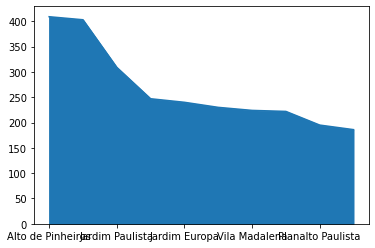

In [168]:
n_imoveis_bairro = dados_imoveis['Bairro'].value_counts()
n_imoveis_bairro.head(10).plot.area()

Creio que algumas pessoas não gostam de gráficos em pizzas, porém, para pequenos dados como este, acho que este tipo de gráfico cai bem pois temos uma forma mais simples de visualizar os dados e confirmar que a média da metragem dos imóveis estão bem próximas.

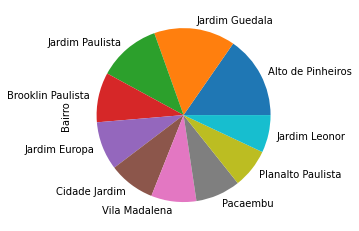

In [169]:
n_imoveis_bairro.head(10).plot.pie()

#4 - Pegar outras estatísticas dos dados (como média, mediana, min, max).

In [176]:
# média das metragens
dados_imoveis['Metragem'].mean()

442.30065947242207

In [177]:
# mediana das metragens
dados_imoveis['Metragem'].median()

290.0

In [178]:
# minímo das metragens
dados_imoveis['Metragem'].min()

10

In [181]:
# máximo das metragens
dados_imoveis['Metragem'].max()

750000

#5 - Descobrir quais são os bairros que não tem nome de rua.

In [196]:
# Somatória de dados vazios por coluna
dados_imoveis.isnull().sum()

Rua          3434
Bairro         12
Cidade          0
Metragem        0
Quartos         0
Banheiros       0
Vagas           0
Valor           0
dtype: int64

In [199]:
# Quais bairros estão com a coluna Rua vazios
dados_imoveis[dados_imoveis['Rua'].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,R$ 400.000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,R$ 750.000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000
